In [2451]:
from data_loader import load_latest_iteration, find_latest_vtu_files

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2452]:
mode = "soft"
FOLDER = f"../demo/cpp/hard/build/src/vtk_output_{mode}/data"

data = load_latest_iteration(FOLDER)

Latest iteration 0 is not the same as the global latest iteration 518


In [2453]:
data.keys()

dict_keys(['domain', 'constraints', 'particles', 'simulation', 'parameters'])

In [2454]:
particles = data["particles"]
parameters = data["parameters"]












In [2455]:
params = data["parameters"]
params

,dt_s,end_time,log_frequency_seconds,min_box_size_x,min_box_size_y,min_box_size_z,xi,TAU,l0,LAMBDA,...,max_bbpgd_iterations,max_recursive_iterations,linked_cell_size,growth_factor,particle_preallocation_factor,mode,x,y,z,rank
0,1.0,42000.0,60.0,2.0,2.0,0.0,720000.0,3240.0,1.0,0.000045,...,100000,50,2.2,1.5,12.0,1,NaN,NaN,NaN,0


In [2456]:
particles.describe()

,gid,quaternion_x,quaternion_y,quaternion_z,quaternion_w,orientation_x,orientation_y,orientation_z,lengths_x,lengths_y,...,velocity_linear_x,velocity_linear_y,velocity_linear_z,velocity_angular_x,velocity_angular_y,velocity_angular_z,rank,x,y,z
count,4795.000000,4795.000000,4795.0,4795.0,4795.000000,4795.000000,4795.000000,4795.0,4795.000000,4795.0,...,4795.000000,4795.000000,4795.0,4795.0,4795.0,4795.000000,4795.000000,4795.000000,4795.000000,4795.0
mean,2509.782482,-0.004290,0.0,0.0,-0.006038,0.009909,0.001997,0.0,1.369161,0.5,...,-0.000063,0.000015,0.0,0.0,0.0,0.000681,7.287800,-0.961973,0.067078,0.0
std,1535.341031,0.710663,0.0,0.0,0.703642,0.730616,0.682866,0.0,0.271288,0.0,...,0.021221,0.021344,0.0,0.0,0.0,0.143921,3.650936,15.421119,14.630792,0.0
min,0.000000,-1.000000,0.0,0.0,-0.999998,-0.999997,-0.999999,0.0,1.000180,0.5,...,-0.251629,-0.170204,0.0,0.0,0.0,-0.822683,0.000000,-31.963200,-30.880700,0.0
25%,1198.500000,-0.719631,0.0,0.0,-0.715585,-0.750588,-0.658149,0.0,1.130515,0.5,...,-0.007369,-0.007530,0.0,0.0,0.0,-0.063082,4.000000,-12.882200,-11.166700,0.0
50%,2397.000000,-0.022757,0.0,0.0,0.001635,0.015095,-0.001574,0.0,1.315800,0.5,...,0.000025,-0.000155,0.0,0.0,0.0,-0.000436,7.000000,-1.916320,0.103310,0.0
75%,4039.500000,0.708952,0.0,0.0,0.684518,0.752497,0.661017,0.0,1.576950,0.5,...,0.007212,0.007308,0.0,0.0,0.0,0.063067,11.000000,12.851850,11.387300,0.0
max,5238.000000,0.999998,0.0,0.0,0.999999,1.000000,0.999997,0.0,1.999740,0.5,...,0.242143,0.264112,0.0,0.0,0.0,1.114600,15.000000,31.848200,31.102500,0.0


In [2457]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import wavelength
import stress

In [2458]:
bin_centers, avg_length, wavelength_fft = wavelength.comprehensive_wavelength_analysis(
    particles, plot=False)


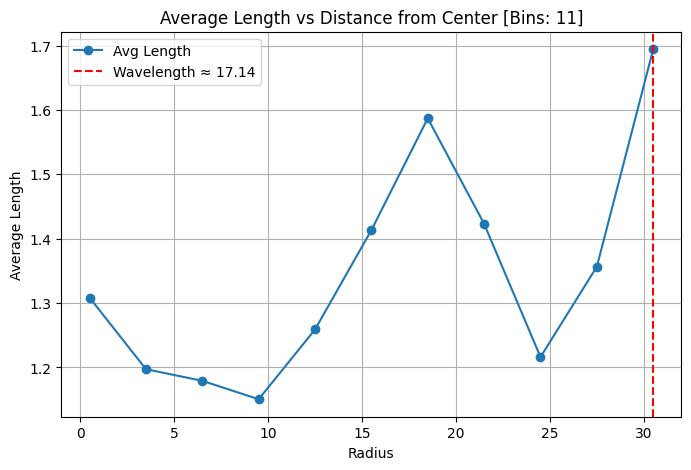

In [2459]:
bin_centers, avg_length, wavelength_fft = wavelength.comprehensive_wavelength_analysis(
    particles)

plt.figure(figsize=(8, 5))
plt.plot(bin_centers, avg_length, "o-", label="Avg Length")
plt.xlabel("Radius")
plt.ylabel("Average Length")
plt.title(f"Average Length vs Distance from Center [Bins: {bin_centers.size}]")
plt.grid(True)

# place vertical lines at multiples of wavelength
first_peak = bin_centers[np.argmax(avg_length)]
max_radius = bin_centers.max()

for direction, color in [(+1, "r"), (-1, "g")]:
    current = first_peak
    while 0 < current < max_radius:
        plt.axvline(current, color=color, linestyle="--")
        current += direction * wavelength_fft

# add one legend entry for wavelength
plt.axvline(first_peak, color="r", linestyle="--",
            label=f"Wavelength ≈ {wavelength_fft:.2f}")

plt.legend()
plt.show()

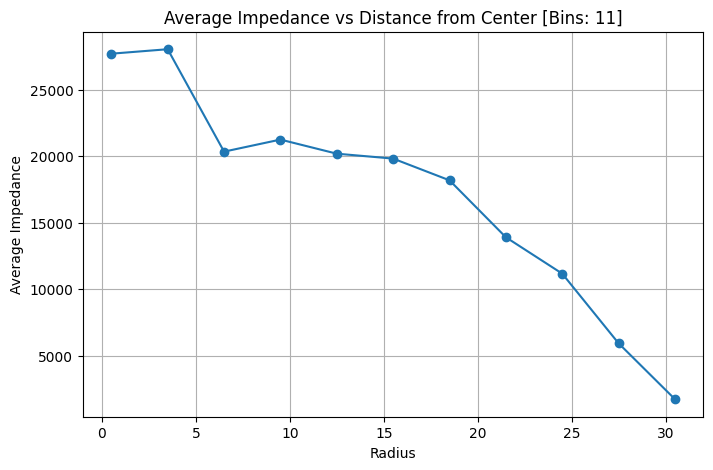

In [2460]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import wavelength
import stress


bin_centers, avg_impedance = stress.stress_distribution(particles)


plt.figure(figsize=(8, 5))
plt.plot(bin_centers, avg_impedance, "o-", label="Avg Impedance")
plt.xlabel("Radius")
plt.ylabel("Average Impedance")
plt.title(
    f"Average Impedance vs Distance from Center [Bins: {bin_centers.size}]")
plt.grid(True)